In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from zipfile import ZipFile
filename = "/content/drive/My Drive/mirflickr25k.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
import shutil
import os

for obj in os.listdir("mirflickr"):
  if ".jpg" not in obj:
    shutil.rmtree("mirflickr/"+obj)
    print("removed " + obj)


removed meta
removed doc


In [0]:
import tensorflow
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
DIR = "mirflickr"

INPUT_RES = 256

SCALE = 2

OUTPUT_RES = INPUT_RES * SCALE

class ImageGenerator(tensorflow.keras.utils.Sequence):
  
  def __init__(self, image_filenames, batch_size):
    
    self.image_filenames = image_filenames
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
  
  def __getitem__(self, idx) :
    batch = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    
    x = []
    y = []
    
    for img in batch:
      x.append(img_to_array(load_img(DIR + "/" + img, target_size=(INPUT_RES, INPUT_RES))) / 255.)
      y.append(img_to_array(load_img(DIR + "/" + img, target_size=(OUTPUT_RES, OUTPUT_RES))) / 255.)
      
    x = np.array(x)
    y = np.array(y)
    
    return x, y

In [0]:
# tf imports
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, ReLU
from keras import optimizers


In [67]:
# HYPER PARAMS

CONV_BLOCKS = 8

#

model = Sequential()

model.add(Conv2D(32, (5,5), padding='same', input_shape = (INPUT_RES, INPUT_RES, 3)))
model.add(BatchNormalization())
model.add(ReLU())


for c in range(CONV_BLOCKS):
  model.add(Conv2D(32, (3,3), padding ='same'))
  model.add(BatchNormalization())
  model.add(ReLU())
  
  if c == CONV_BLOCKS - 2:
    model.add(UpSampling2D())


model.add(Conv2D(3, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))

adam = tensorflow.keras.optimizers.Adam(lr = 0.0005)
model.compile(optimizer=adam, loss='mse')
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_187 (Conv2D)          (None, 256, 256, 32)      2432      
_________________________________________________________________
batch_normalization_187 (Bat (None, 256, 256, 32)      128       
_________________________________________________________________
re_lu_169 (ReLU)             (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_188 (Conv2D)          (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization_188 (Bat (None, 256, 256, 32)      128       
_________________________________________________________________
re_lu_170 (ReLU)             (None, 256, 256, 32)      0         
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 256, 256, 32)    

In [0]:
batch_size = 20
import os
training_gen = ImageGenerator(os.listdir(DIR), batch_size)

In [69]:
model.fit_generator(generator = training_gen,
                   steps_per_epoch = 100,
                   epochs = 50)

Epoch 1/50
100/100 [==============================] - 89s 889ms/step - loss: 0.0276
Epoch 2/50
100/100 [==============================] - 82s 818ms/step - loss: 0.0183
Epoch 3/50
100/100 [==============================] - 82s 818ms/step - loss: 0.0165
Epoch 4/50
100/100 [==============================] - 82s 818ms/step - loss: 0.0140
Epoch 5/50
100/100 [==============================] - 82s 819ms/step - loss: 0.0124
Epoch 6/50
100/100 [==============================] - 82s 819ms/step - loss: 0.0115
Epoch 7/50
100/100 [==============================] - 82s 818ms/step - loss: 0.0108
Epoch 8/50
100/100 [==============================] - 82s 818ms/step - loss: 0.0099
Epoch 9/50
100/100 [==============================] - 82s 819ms/step - loss: 0.0088
Epoch 10/50
100/100 [==============================] - 82s 819ms/step - loss: 0.0088
Epoch 11/50
100/100 [==============================] - 82s 819ms/step - loss: 0.0078
Epoch 12/50
100/100 [==============================] - 82s 819ms/step - lo

In [0]:
model.save_weights('model.h5')

# Save the model architecture
with open('model_arch.json', 'w') as f:
    f.write(model.to_json())

(256, 256, 3)


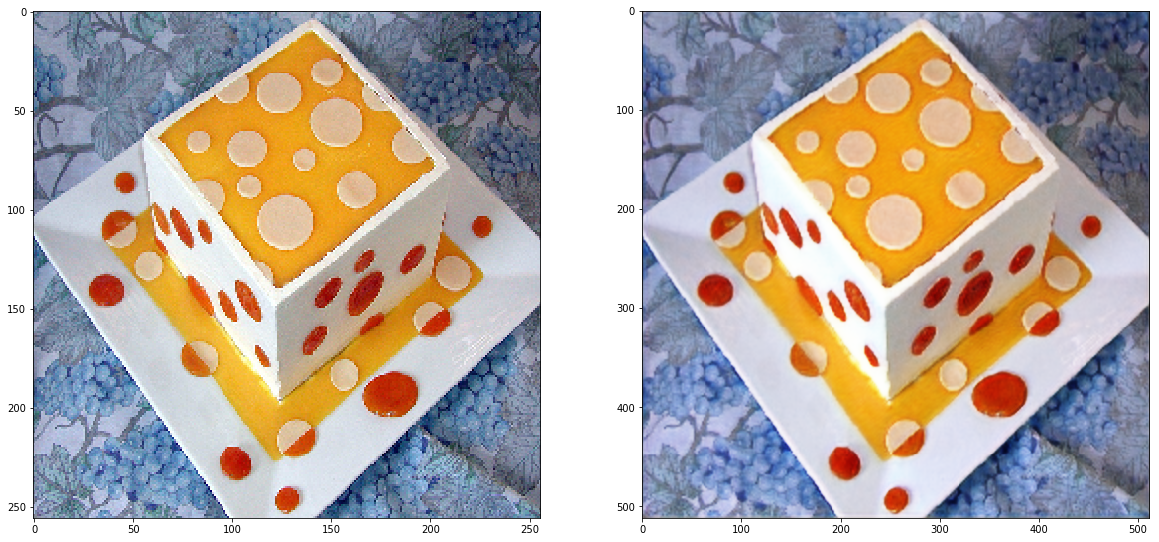

In [78]:
import matplotlib.pyplot as plt
img = np.array(img_to_array(load_img(DIR + "/" + os.listdir(DIR)[0], target_size = (256, 256))))
img /= 255.
print(img.shape)

pred = model.predict(img.reshape(1, 256, 256, 3))


fig=plt.figure(figsize=(20, 20))

fig.add_subplot(1, 2, 1)
plt.imshow(img)
fig.add_subplot(1, 2, 2)
plt.imshow(pred[0])
    


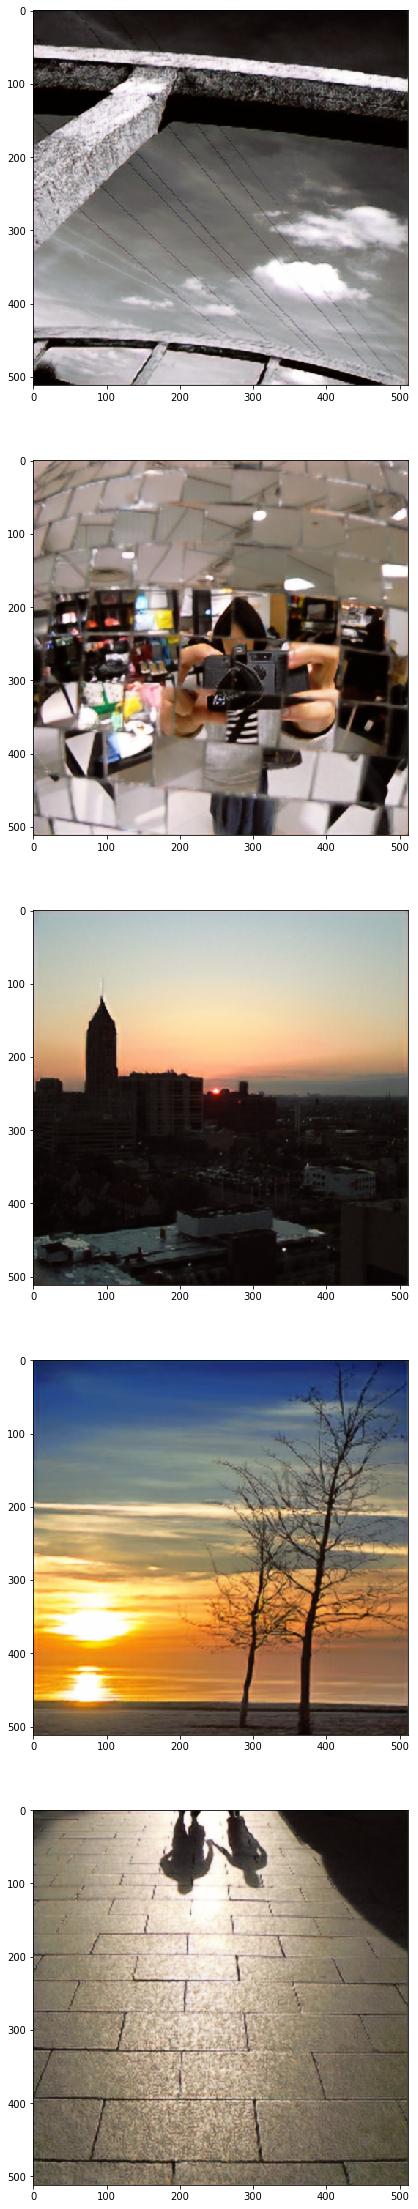

In [75]:
offset = 10

fig=plt.figure(figsize=(40, 40))
columns = 1
rows = 5
for i in range(1, columns*rows +1):
    img = np.array(img_to_array(load_img(DIR + "/" + os.listdir(DIR)[i + offset], target_size = (256, 256))))
    img /= 255.
    img = model.predict(img.reshape(1, 256, 256, 3))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img[0])
plt.show()